In [42]:
%reset


In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
import os
#set path for root directory
ROOT_DIR = os.path.abspath(os.curdir)

In [154]:
%reload_ext autoreload
%autoreload 1

In [155]:
from hydroplotting import funcutils as fc

In [157]:
#read in data
path_flow_obs = ROOT_DIR + '/Data/Raw/12147600_ref_short.csv'
#path_flow_model = ROOT_DIR + '/Data/Raw/12147600_prism_delta.day'
path_flow_model = ROOT_DIR + '/Data/Raw/12147600_prism_grid.day'
#path_flow_model = ROOT_DIR + '/Data/Raw/12147600_67.day'

<Axes: xlabel='datetime'>

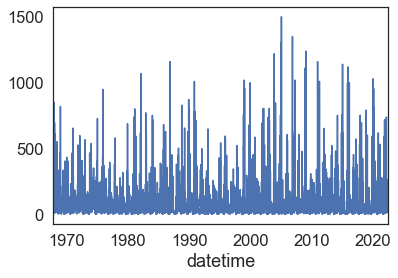

In [158]:
flow_obs = pd.read_csv(path_flow_obs,  header = None)
flow_obs.columns = ['year', 'month', 'day', 'Q_cms']
flow_obs['datetime'] = pd.to_datetime(flow_obs[['year', 'month', 'day']])
flow_obs = flow_obs.set_index('datetime')
flow_obs['datetime'] = pd.to_datetime(flow_obs[['year', 'month', 'day']])
fc.calc_water_year_apply(flow_obs)
flow_obs['water_year_str'] = flow_obs['water_year'].astype(str)
flow_obs.Q_cms.plot()
#flow_obs

In [159]:
#monthly mean
#flow_obs_mm = flow_obs.resample('M').mean()

In [160]:
flow_obs

,year,month,day,Q_cms,datetime,water_year,water_year_str
datetime,,,,,,,
1967-11-01,1967,11,1,114.0,1967-11-01,1968,1968
1967-11-02,1967,11,2,54.0,1967-11-02,1968,1968
1967-11-03,1967,11,3,37.0,1967-11-03,1968,1968
1967-11-04,1967,11,4,29.0,1967-11-04,1968,1968
1967-11-05,1967,11,5,24.0,1967-11-05,1968,1968
...,...,...,...,...,...,...,...
2022-06-01,2022,6,1,104.0,2022-06-01,2022,2022
2022-06-02,2022,6,2,119.0,2022-06-02,2022,2022
2022-06-03,2022,6,3,161.0,2022-06-03,2022,2022


In [161]:
flow_model = pd.read_csv(path_flow_model, sep='\s+', header = None)
flow_model.columns = ['year', 'month', 'day', 'Q_cms']
flow_model['datetime'] = pd.to_datetime(flow_model[['year', 'month', 'day']])
flow_model = flow_model.set_index('datetime')
flow_model['datetime'] = pd.to_datetime(flow_model[['year', 'month', 'day']])
#apply water year
fc.calc_water_year_apply(flow_model)
flow_model['water_year_str'] = flow_model['water_year'].astype(str)
#flow_model

In [162]:
flow_model

,year,month,day,Q_cms,datetime,water_year,water_year_str
datetime,,,,,,,
1981-01-01,1981,1,1,292.9715,1981-01-01,1981,1981
1981-01-02,1981,1,2,149.9101,1981-01-02,1981,1981
1981-01-03,1981,1,3,54.4902,1981-01-03,1981,1981
1981-01-04,1981,1,4,26.4801,1981-01-04,1981,1981
1981-01-05,1981,1,5,14.9948,1981-01-05,1981,1981
...,...,...,...,...,...,...,...
2020-12-27,2020,12,27,25.0382,2020-12-27,2021,2021
2020-12-28,2020,12,28,18.0051,2020-12-28,2021,2021
2020-12-29,2020,12,29,13.9614,2020-12-29,2021,2021


In [163]:
period1_model = flow_model.loc['1981-10-01':'2000-09-30']
period2_model = flow_model.loc['2000-10-01':'2015-09-30']
period_all_model = flow_model.loc['1981-10-01':'2015-09-30']
period1_model_monthly_mean = period1_model.groupby(period1_model.index.month).mean()
period2_model_monthly_mean = period2_model.groupby(period2_model.index.month).mean()
period_all_model_monthly_mean = period_all_model.groupby(period_all_model.index.month).mean()

period1_obs = flow_obs.loc['1981-10-01':'2000-09-30']
period2_obs = flow_obs.loc['2000-10-01':'2015-09-30']
period_all_obs = flow_obs.loc['1981-10-01':'2015-09-30']
period1_obs_monthly_mean = period1_obs.groupby(period1_obs.index.month).mean()
period2_obs_monthly_mean = period2_obs.groupby(period2_obs.index.month).mean()
period_all_obs_monthly_mean = period_all_obs.groupby(period_all_obs.index.month).mean()


In [164]:
def month_wy_for_plotting(calendar_monthly_mean):
    temp = calendar_monthly_mean.loc[10:12]
    model_monthly_mean_plot = pd.concat([temp, calendar_monthly_mean]).reset_index(drop = True)
    model_monthly_mean_plot.drop(model_monthly_mean_plot.tail(3).index, inplace = True)
    return model_monthly_mean_plot

period1_model_monthly_mean_plot = month_wy_for_plotting(period1_model_monthly_mean)
period2_model_monthly_mean_plot = month_wy_for_plotting(period2_model_monthly_mean)
period_all_model_monthly_mean_plot = month_wy_for_plotting(period_all_model_monthly_mean)

period1_obs_monthly_mean_plot = month_wy_for_plotting(period1_obs_monthly_mean)
period2_obs_monthly_mean_plot = month_wy_for_plotting(period2_obs_monthly_mean)
period_all_obs_monthly_mean_plot = month_wy_for_plotting(period_all_obs_monthly_mean)

Text(0, 0.5, 'Q [cms]')

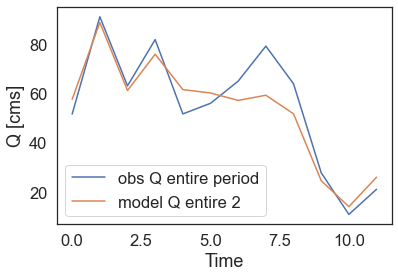

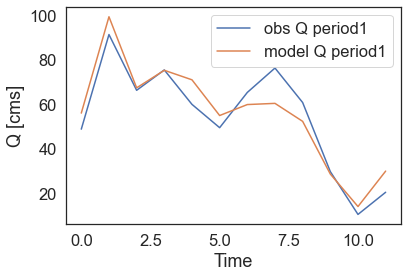

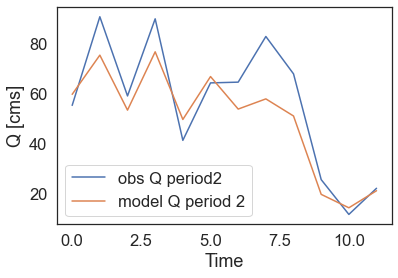

In [165]:
#f, (ax1, ax2) = plt.subplots(1, 2) # sharey=True
ax1 = period_all_obs_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'obs Q entire period')
period_all_model_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'model Q entire 2', ax = ax1)
#ax.set_xlim([datetime(1996, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Q [cms]')

ax2 = period1_obs_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'obs Q period1')
period1_model_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'model Q period1', ax = ax2)
#ax.set_xlim([datetime(1996, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Q [cms]')

ax3 = period2_obs_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'obs Q period2')
period2_model_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'model Q period 2', ax = ax3)
#ax.set_xlim([datetime(1996, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Q [cms]')

#period1_model_monthly_mean

In [166]:
flow_model_by_wy = flow_model.groupby(['water_year_str'])
flow_obs_by_wy = flow_obs.groupby(['water_year_str'])

In [167]:
wy_groups = flow_model_by_wy.groups
#wy_groups
wy_groups.keys()

dict_keys(['1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])

In [181]:
model_ = flow_model_by_wy.get_group('1994')
#or, get a specific year with this
#model_flow_2011 = flow_model[flow_model['water_year'] == 1981]


In [182]:
obs_ = flow_obs_by_wy.get_group('1994')
#or, get a specific year with this
#model_flow_2011 = flow_model[flow_model['water_year'] == 1981]
obs_


,year,month,day,Q_cms,datetime,water_year,water_year_str
datetime,,,,,,,
1993-10-01,1993,10,1,2.7,1993-10-01,1994,1994
1993-10-02,1993,10,2,2.6,1993-10-02,1994,1994
1993-10-03,1993,10,3,2.6,1993-10-03,1994,1994
1993-10-04,1993,10,4,2.5,1993-10-04,1994,1994
1993-10-05,1993,10,5,2.5,1993-10-05,1994,1994
...,...,...,...,...,...,...,...
1994-09-26,1994,9,26,6.6,1994-09-26,1994,1994
1994-09-27,1994,9,27,6.3,1994-09-27,1994,1994
1994-09-28,1994,9,28,5.9,1994-09-28,1994,1994


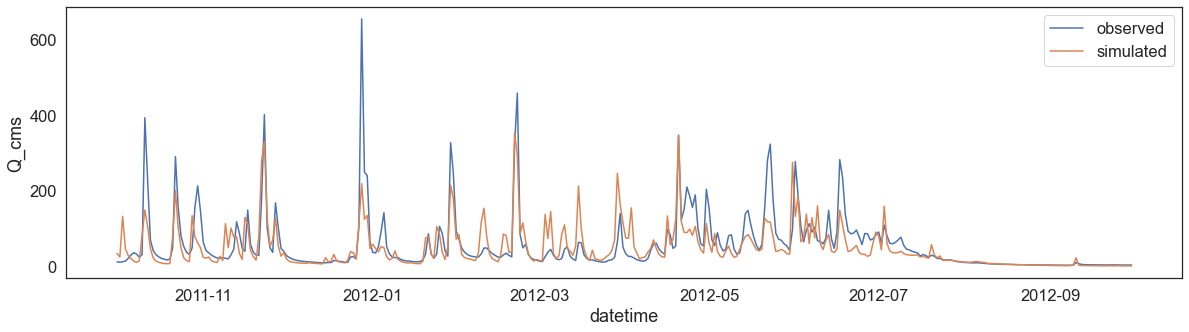

In [178]:
#sns.relplot(data = obs_2012, x="datetime", y="Q_cms", kind="line")
#merge obs and model in one dataframe to plot
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='datetime', y = 'Q_cms', label = 'observed', data = obs_2012)
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated', data = model_2012)
sns.set_theme(style='white', font_scale=3)

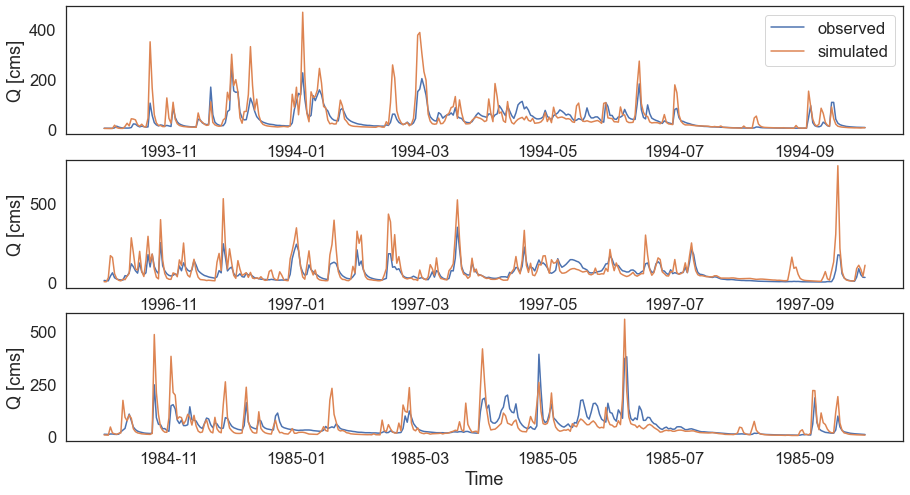

In [180]:
#plot three years
#select data

f, axes = plt.subplots(3, 1, figsize=(15, 8))
#fig.tight_layout(h_pad=5, w_pad=5)
plt.subplots_adjust(hspace=0.2, wspace=0)
sns.lineplot(x='datetime', y = 'Q_cms', label = 'observed', data = flow_obs_by_wy.get_group('1994'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated', data = flow_model_by_wy.get_group('1994'), ax=axes[0])
axes[0].set_ylabel('Q [cms]')

#axes[0].set_xlim([datetime(2019, 10, 1), datetime(2020, 9, 31)])

sns.lineplot(x='datetime', y = 'Q_cms',  data = flow_obs_by_wy.get_group('1997'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_by_wy.get_group('1997'), ax=axes[1])
plt.ylabel( "Q [cms]")
axes[1].set_ylabel('Q [cms]')


sns.lineplot(x='datetime', y = 'Q_cms',  data = flow_obs_by_wy.get_group('1985'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_by_wy.get_group('1985'), ax=axes[2])

# Set label for x-axis
axes[2].set_xlabel( "Time")
axes[2].set_ylabel('Q [cms]')
sns.set_theme(style='white', font_scale=1.5)
plt.show()


In [183]:
nse_test = fc.nse(model_['Q_cms'], obs_['Q_cms'])
nse_test

-0.10871714143496147

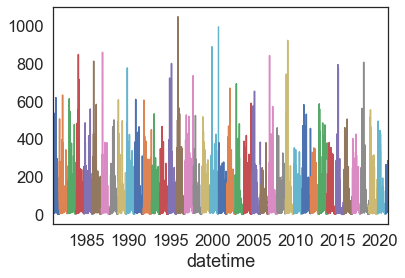

In [173]:
#initialize list
nse = []
year = []
for group in flow_obs_by_wy:
    for gr in flow_model_by_wy:
        if group[0]==gr[0]:
            nse_test = fc.nse(gr[1].Q_cms, group[1].Q_cms)
            gr[1].Q_cms.plot()
            #sns.relplot(data=gr[1], x="datetime", y="Q_cms", hue="month", kind="line")
            year.append(group[0])
            nse.append(nse_test)
            #nse(0) = gr[0]
            #nse(1) = nse_test
nse_run = dict(zip(year, nse))

In [174]:
nse_run

{'1981': 0.8433929111057976,
 '1982': 0.6493328323932132,
 '1983': 0.6408838693888452,
 '1984': 0.6900260599046437,
 '1985': 0.1790745725127577,
 '1986': 0.6812765920675508,
 '1987': 0.8033545753139578,
 '1988': 0.480784353820113,
 '1989': 0.7106198463233975,
 '1990': 0.6378427295986622,
 '1991': 0.5509261921684685,
 '1992': 0.49952230307756285,
 '1993': 0.3076639748287502,
 '1994': -0.10871714143496147,
 '1995': 0.3657239359740171,
 '1996': 0.39273046294800906,
 '1997': -0.4005872158627357,
 '1998': 0.4093831351561237,
 '1999': 0.5563043307569695,
 '2000': 0.6746070343489607,
 '2001': 0.060368367908331555,
 '2002': 0.7583133297667433,
 '2003': 0.6374303760607336,
 '2004': 0.4254832373682078,
 '2005': 0.5662287624377309,
 '2006': 0.5390269726325216,
 '2007': 0.7271525774282791,
 '2008': 0.5752835373583227,
 '2009': 0.8076561242046821,
 '2010': 0.31899374103960987,
 '2011': 0.5749252062459698,
 '2012': 0.5453425757330306,
 '2013': 0.23778133547876834,
 '2014': 0.6227793274211331,
 '2015

In [175]:
nse_all = nse_run.values()

data_nse = list(nse_all)
data_nse = np.array(data_nse)
min_nse = data_nse.min()
max_nse = data_nse.max()
med_nse = np.median(data_nse)
print(min_nse)
print(max_nse)
print(med_nse)

-0.4005872158627357
0.8433929111057976
0.5916297916725222


<Axes: ylabel='Count'>

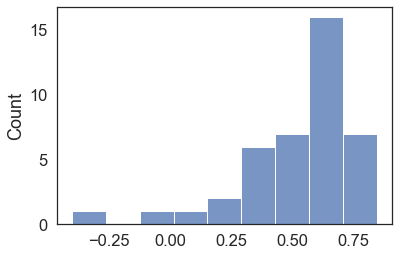

In [176]:


# print the numpy array
sns.histplot(data_nse)

In [27]:
gr[1]

,year,month,day,Q_cms,datetime,water_year,water_year_str
datetime,,,,,,,
2020-10-01,2020,10,1,6.7896,2020-10-01,2021,2021
2020-10-02,2020,10,2,5.9484,2020-10-02,2021,2021
2020-10-03,2020,10,3,5.3339,2020-10-03,2021,2021
2020-10-04,2020,10,4,5.2279,2020-10-04,2021,2021
2020-10-05,2020,10,5,4.8929,2020-10-05,2021,2021
...,...,...,...,...,...,...,...
2020-12-27,2020,12,27,19.0024,2020-12-27,2021,2021
2020-12-28,2020,12,28,15.0975,2020-12-28,2021,2021
2020-12-29,2020,12,29,12.2929,2020-12-29,2021,2021


In [28]:
flow_model

,year,month,day,Q_cms,datetime,water_year,water_year_str
datetime,,,,,,,
1981-01-01,1981,1,1,293.0396,1981-01-01,1981,1981
1981-01-02,1981,1,2,150.0490,1981-01-02,1981,1981
1981-01-03,1981,1,3,54.6077,1981-01-03,1981,1981
1981-01-04,1981,1,4,26.0667,1981-01-04,1981,1981
1981-01-05,1981,1,5,15.0114,1981-01-05,1981,1981
...,...,...,...,...,...,...,...
2020-12-27,2020,12,27,19.0024,2020-12-27,2021,2021
2020-12-28,2020,12,28,15.0975,2020-12-28,2021,2021
2020-12-29,2020,12,29,12.2929,2020-12-29,2021,2021


In [29]:
#select periods
period1_model = flow_model.loc['1981-10-1':'2000-9-31']
period2_model = flow_model.loc['2000-10-1':'2015-9-31']

#period1_model_mean = period1_model.resample('M').mean()
#period2_model_mean = period2_model.resample('M').mean()

period1_model_monthly_mean = period1_model.groupby(period1_model.index.month).mean()
period2_model_monthly_mean = period2_model.groupby(period2_model.index.month).mean()


#test = flow_model.resample('M').mean()
#test = flow_model.resample('M').mean()
#multi_month_mean = flow_model.groupby(flow_model.index.month).mean()
#multi_month_mean.Q_cms.plot()

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [2000-9-31] of type str

In [30]:
def month_wy_for_plotting(calendar_monthly_mean):
    temp = calendar_monthly_mean.loc[10:12]
    model_monthly_mean_plot = pd.concat([temp, calendar_monthly_mean]).reset_index(drop = True)
    model_monthly_mean_plot.drop(model_monthly_mean_plot.tail(3).index, inplace = True)
    return model_monthly_mean_plot

period1_model_monthly_mean_plot = month_wy_for_plotting(period1_model_monthly_mean)
period2_model_monthly_mean_plot = month_wy_for_plotting(period2_model_monthly_mean)


In [31]:
period1_model_monthly_mean_plot

,year,month,day,Q_cms,water_year
0,1990.000000,10.0,16.000000,43.564752,1991.000000
1,1990.000000,11.0,15.500000,82.858844,1991.000000
2,1990.000000,12.0,16.000000,53.022311,1991.000000
3,1991.000000,1.0,16.000000,52.815434,1991.000000
4,1991.009311,2.0,14.635009,49.651407,1991.009311
5,1991.000000,3.0,16.000000,41.563329,1991.000000
6,1991.000000,4.0,15.500000,55.202679,1991.000000
7,1991.000000,5.0,16.000000,66.495093,1991.000000
8,1991.000000,6.0,15.500000,59.313054,1991.000000
9,1991.000000,7.0,16.000000,32.576225,1991.000000


Text(0, 0.5, 'Q [cms]')

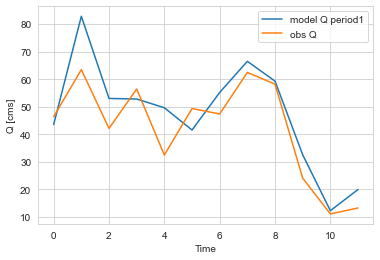

In [32]:


#period1_model_monthly_mean_plot.Q_cms.plot()

ax = period1_model_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'model Q period1')
period2_model_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'obs Q', ax = ax)
#ax.set_xlim([datetime(1996, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Q [cms]')
#period1_model_monthly_mean


In [33]:
period1_model_monthly_mean

,year,month,day,Q_cms,water_year
datetime,,,,,
1,1991.000000,1.0,16.000000,52.815434,1991.000000
2,1991.009311,2.0,14.635009,49.651407,1991.009311
3,1991.000000,3.0,16.000000,41.563329,1991.000000
4,1991.000000,4.0,15.500000,55.202679,1991.000000
5,1991.000000,5.0,16.000000,66.495093,1991.000000
6,1991.000000,6.0,15.500000,59.313054,1991.000000
7,1991.000000,7.0,16.000000,32.576225,1991.000000
8,1991.000000,8.0,16.000000,12.283130,1991.000000
9,1991.000000,9.0,15.500000,19.990549,1991.000000


In [34]:
#plot modeled SWE vs. observed at Skookum Creek
ax = flow_model_month.plot(kind='line',  y = 'Q_cms', label = 'model Q')
flow_obs_month.plot(kind='line',  y = 'Q_cms', label = 'obs Q', ax = ax)
ax.set_xlim([datetime(1996, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('SWE [in]')

NameError: name 'flow_model_month' is not defined

In [98]:
type(nse_run)

dict